Логистическая регрессия (LogisticRegression)



In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]
pima.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

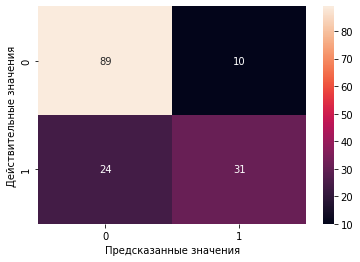

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
METRICS = {"log_reg": [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, pos_label='0'),metrics.recall_score(y_test, y_pred, pos_label='0')]}

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label='0')

0.7876106194690266

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label='0')

0.898989898989899

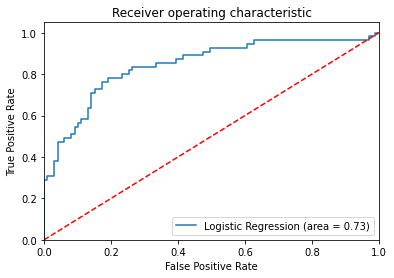

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cls.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, cls.predict_proba(x_test)[:,1], pos_label = '1')
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Метод опорных векторов с линейным ядром (SVC) 

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
METRICS['MOB linear'] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, pos_label='0'),metrics.recall_score(y_test, y_pred, pos_label='0')]

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label='0')

0.7876106194690266

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label='0')

0.898989898989899

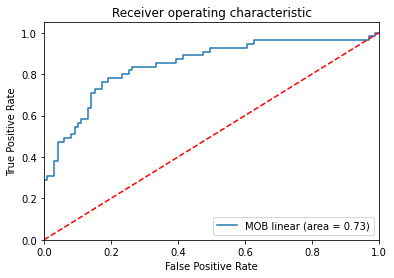

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, cls.predict_proba(x_test)[:,1], pos_label = '1')
plt.figure()
plt.plot(fpr, tpr, label='MOB linear (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MOB_ROC')
plt.show()

Сравнивая все три метрики, можно сделать вывод о том, что метод опорных векторов с линейным ядром (SVC) классифицирует также, как и логиситическая регрессия

Метод опорных векторов с гауссовым ядром (SVC)

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='rbf', degree=2)
model.fit(x_train, y_train)

SVC(degree=2)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
METRICS['MOB rbf'] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, pos_label='0'),metrics.recall_score(y_test, y_pred, pos_label='0')]

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7857142857142857

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label='0')

0.775

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label='0')

0.9393939393939394

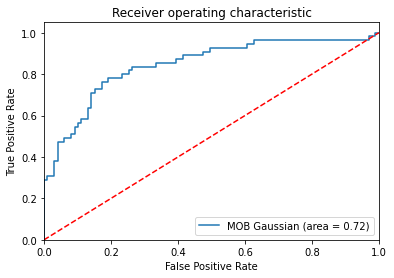

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, cls.predict_proba(x_test)[:,1], pos_label = '1')
plt.figure()
plt.plot(fpr, tpr, label='MOB Gaussian (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MOB_ROC')
plt.show()

Метод k ближайших соседей (KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
METRICS['k neighbors'] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, pos_label='0'),metrics.recall_score(y_test, y_pred, pos_label='0')]

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7337662337662337

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label='0')

0.7735849056603774

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label='0')

0.8282828282828283

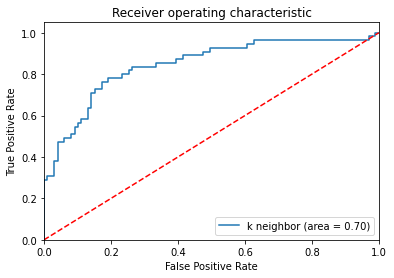

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, cls.predict_proba(x_test)[:,1], pos_label = '1')
plt.figure()
plt.plot(fpr, tpr, label='k neighbor (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('kneighbor')
plt.show()

Многослойный перцептрон (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=130,learning_rate="adaptive") 
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=130, learning_rate='adaptive')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
METRICS['MLP'] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, pos_label='0'),metrics.recall_score(y_test, y_pred, pos_label='0')]

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7337662337662337

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label='0')

0.7735849056603774

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label='0')

0.8282828282828283

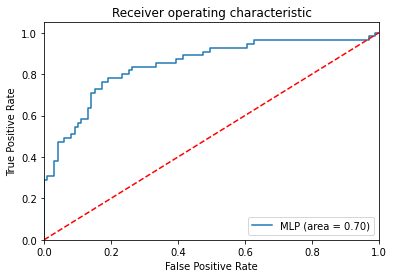

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, cls.predict_proba(x_test)[:,1], pos_label = '1')
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MLP_ROC')
plt.show()

Сравнение результатов

In [ ]:
METRICS

{'log_reg': [0.7792207792207793, 0.7876106194690266, 0.898989898989899],
 'MOB linear': [0.7792207792207793, 0.7876106194690266, 0.898989898989899],
 'MOB rbf': [0.7857142857142857, 0.775, 0.9393939393939394],
 'k neighbors': [0.7337662337662337, 0.7735849056603774, 0.8282828282828283],
 'MLP': [0.7337662337662337, 0.7735849056603774, 0.8282828282828283]}

In [ ]:
import pandas as pd
res = pd.DataFrame.from_dict(METRICS)
res.index = ['accuracy','precision','recall']
res

,log_reg,MOB linear,MOB rbf,k neighbors,MLP
accuracy,0.779221,0.779221,0.785714,0.733766,0.733766
precision,0.787611,0.787611,0.775000,0.773585,0.773585
recall,0.898990,0.898990,0.939394,0.828283,0.828283


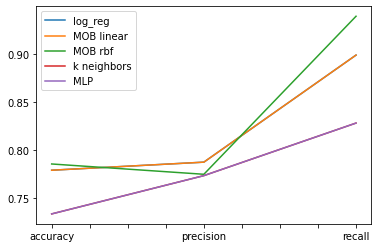

In [ ]:
res.plot(kind = 'line')

В среднем лучшие показатели покаывает линейный метод опорных векторов и логистическая регрессия

In [ ]:
from sklearn.model_selection import learning_curve 
from sklearn.svm import SVC
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), x_train, y_train, train_sizes=[50, 80, 110], cv=5)

In [ ]:
iris = datasets.load_iris() 
X = iris.data 
target = iris.target 
names = iris.target_names

array([[0.78      , 0.86      , 0.86      , 0.86      , 0.86      ],
       [0.825     , 0.875     , 0.875     , 0.875     , 0.875     ],
       [0.85454545, 0.82727273, 0.82727273, 0.82727273, 0.82727273]])